----- Linear Regression -----


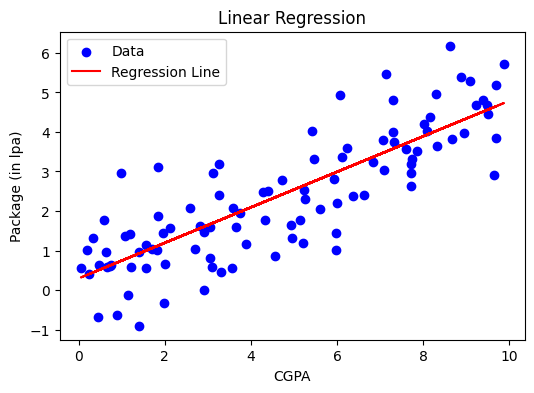

R2 Score (Linear Regression): 0.5729121239742831

----- Polynomial Regression -----


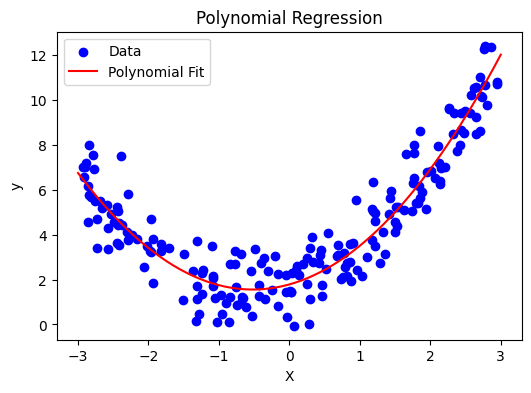

R2 Score (Polynomial Regression): 0.8897290087312748

----- Logistic Regression -----


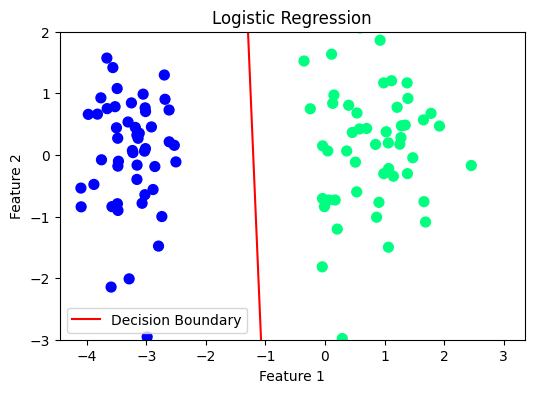

In [3]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score

# ================================
# 1. LINEAR REGRESSION
# ================================

print("----- Linear Regression -----")
# Generating sample data (CGPA vs Package prediction)
np.random.seed(42)
cgpa = 10 * np.random.rand(100, 1)
package = 0.5 * cgpa + np.random.randn(100, 1)

X = cgpa
y = package

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Gradient Descent Function
def gradient_descent(X, y, learning_rate=0.01, iterations=10000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(iterations):
        y_pred = X @ theta
        error = y_pred - y.ravel()
        gradient = (1/m) * X.T @ error
        theta -= learning_rate * gradient
    return theta

# Add bias term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

theta = gradient_descent(X_train_b, y_train)

# Predict
def predict(X, theta):
    return X @ theta

y_pred = predict(X_test_b, theta)

# Plot
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_train, predict(X_train_b, theta), color='red', label='Regression Line')
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')
plt.legend()
plt.title("Linear Regression")
plt.show()

print("R2 Score (Linear Regression):", r2_score(y_test, y_pred))


# ================================
# 2. POLYNOMIAL REGRESSION
# ================================

print("\n----- Polynomial Regression -----")
# Generate nonlinear data: y = 0.8x^2 + 0.9x + 2 + noise
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Transform to polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Gradient Descent
theta_poly = gradient_descent(X_train_poly, y_train)

# Predict
y_pred_poly = predict(X_test_poly, theta_poly)

# Plot
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = predict(X_new_poly, theta_poly)

plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_new, y_new, color='red', label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title("Polynomial Regression")
plt.show()

print("R2 Score (Polynomial Regression):", r2_score(y_test, y_pred_poly))


# ================================
# 3. LOGISTIC REGRESSION
# ================================

print("\n----- Logistic Regression -----")
# Generate classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,
                           hypercube=False, class_sep=20)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def logistic_gradient_descent(X, y, learning_rate=0.5, iterations=5000):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    for _ in range(iterations):
        y_hat = sigmoid(X @ weights)
        weights += learning_rate * (X.T @ (y - y_hat)) / X.shape[0]
    return weights[1:], weights[0]

coef_, intercept_ = logistic_gradient_descent(X, y)

# Decision boundary
m = -coef_[0] / coef_[1]
b = -intercept_ / coef_[1]
x_new = np.linspace(-3, 3, 100)
y_pred = m * x_new + b

# Plot
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=50)
plt.plot(x_new, y_pred, color='red', label='Decision Boundary')
plt.ylim(-3, 2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Logistic Regression")
plt.legend()
plt.show()